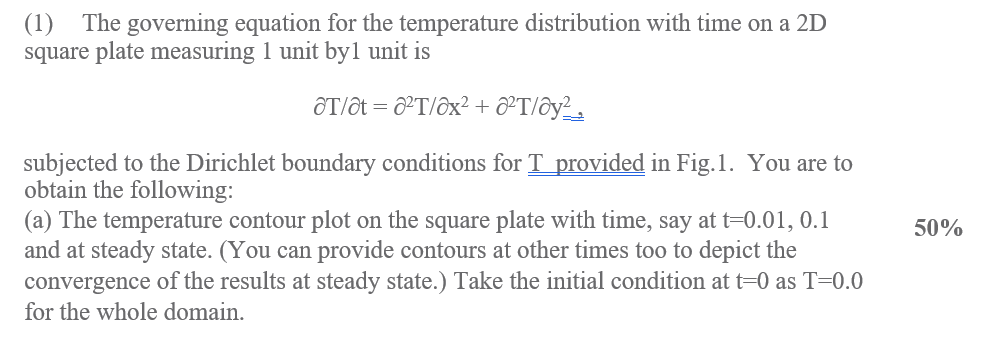

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Setup the bondaries for Qn1

In [2]:
# Parameters
L = 1.0  # length of the square plate
N = 50  # number of grid points per dimension
dx = L / (N - 1)  # space step
dt = 0.0001  # time step, increased for stability and speed

# Initialize temperature array
I = np.zeros((N, N))

# Boundary conditions
I[-1, :] = 1  # top boundary

define function for the central finite difference for the heat equation

In [3]:
def finite_difference(T, dx, dt):
    T_new = T.copy()
    T_new[1:-1, 1:-1] = T[1:-1, 1:-1] + dt * (
        (T[2:, 1:-1] - 2*T[1:-1, 1:-1] + T[:-2, 1:-1]) / dx**2 +
        (T[1:-1, 2:] - 2*T[1:-1, 1:-1] + T[1:-1, :-2]) / dx**2)
    return T_new

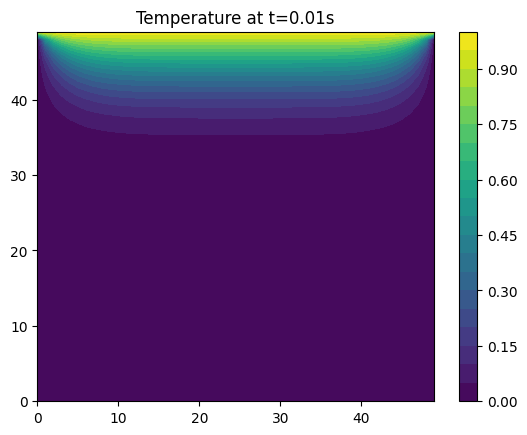

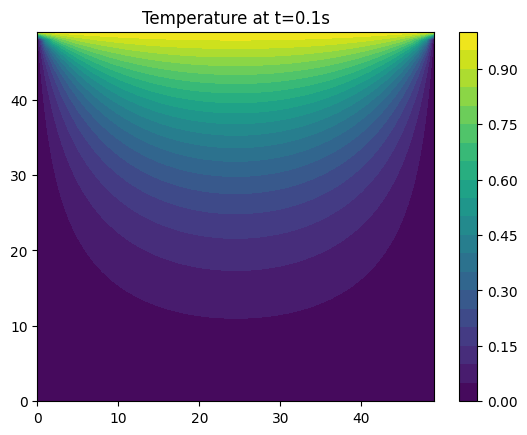

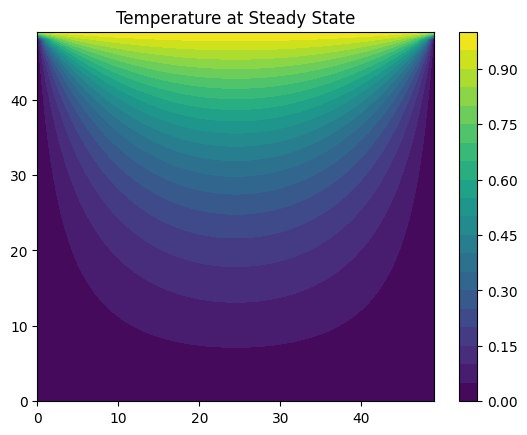

In [4]:
# Time points to plot
time_points = [0.01, 0.1]
times_to_plot = [int(t / dt) for t in time_points]
current_time_step = 0

T = I #set the initial state

# Simulation for the given time points
for step in range(1, max(times_to_plot) + 1):
    T = finite_difference(T, dx, dt)
    if step in times_to_plot:
        plt.figure()
        plt.contourf(T, levels=20, cmap='viridis')
        plt.colorbar()
        plt.title(f"Temperature at t={time_points[times_to_plot.index(step)]}s")
        plt.show()
    current_time_step += 1

# Continue the simulation to reach steady state
tolerance = 1e-5  # Tolerance to assume steady state is reached
steady_state_reached = False
while not steady_state_reached:
    T_new = finite_difference(T, dx, dt)
    # Check if the maximum change in temperature is below the tolerance
    if np.max(np.abs(T_new - T)) < tolerance:
        steady_state_reached = True
    T = T_new

# Plot steady state
plt.figure()
plt.contourf(T, levels=20, cmap='viridis')
plt.colorbar()
plt.title("Temperature at Steady State")
plt.show()

In [5]:
#save the steady state for future referece(comparison with Laplace solution)
CFD_SS = T
print(T)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.35256044e-04 8.68637697e-04 ... 8.68637697e-04
  4.35256044e-04 0.00000000e+00]
 [0.00000000e+00 8.72556173e-04 1.74135194e-03 ... 1.74135194e-03
  8.72556173e-04 0.00000000e+00]
 ...
 [0.00000000e+00 3.01394974e-01 4.98093229e-01 ... 4.98093229e-01
  3.01394974e-01 0.00000000e+00]
 [0.00000000e+00 4.99523219e-01 6.96698072e-01 ... 6.96698072e-01
  4.99523219e-01 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


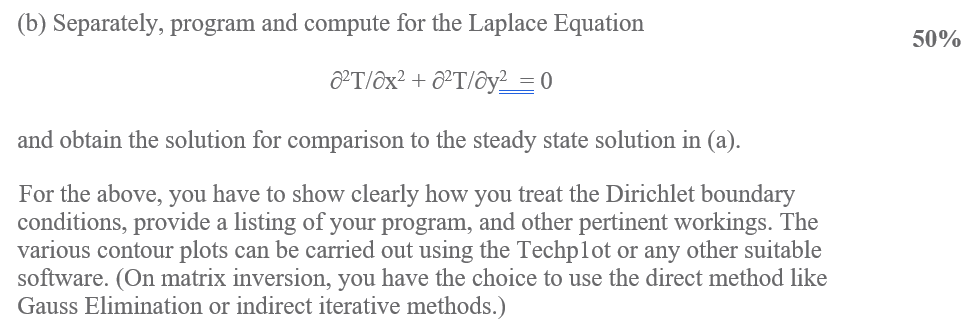

In [6]:
# Gauss-Seidel method
def gauss_seidel(T, max_iter=5000, tol=1e-6):
    for it in range(max_iter):
        T_old = T.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                T[i, j] = 0.25 * (T_old[i-1, j] + T_old[i+1, j] + T_old[i, j-1] + T_old[i, j+1])
        if np.abs(T - T_old).max() < tol:
            break
    return T

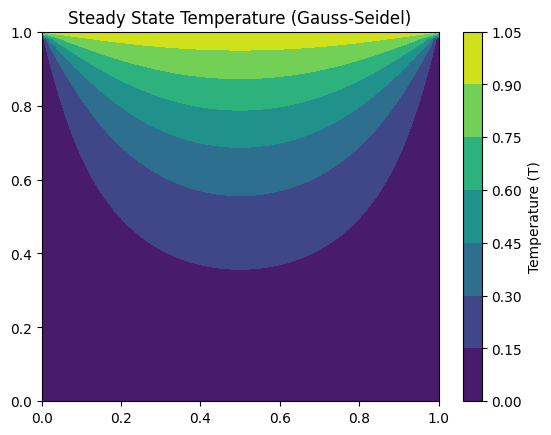

In [7]:
T = I #reset the initial state
L_SS = gauss_seidel(T)

# Solve
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
plt.title("Steady State Temperature (Gauss-Seidel)")
plt.contourf(X, Y, L_SS)
plt.colorbar(label="Temperature (T)")
plt.show()

Comparing the plots for the Central finite difference and Gauss seidel method

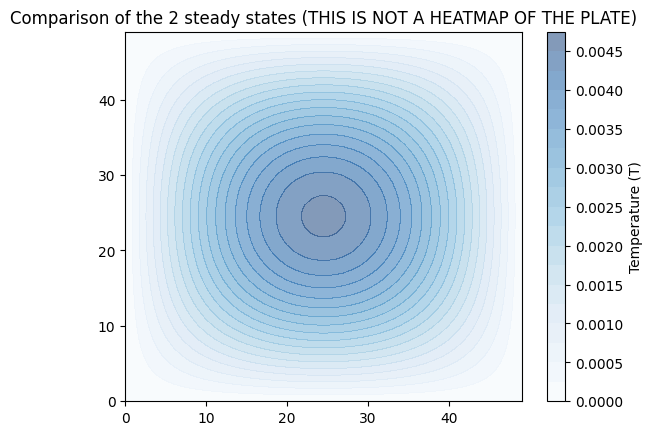

In [13]:
T = L_SS - CFD_SS# difference between the 2 steady states

plt.title("Comparison of the 2 steady states (THIS IS NOT A HEATMAP OF THE PLATE)")
plt.contourf(T, levels=20, cmap='Blues',alpha = 0.5)
plt.colorbar(label="Temperature (T)")
plt.show()

The difference between the 2 steady states is very small and is even at it's furthest difference, they are only 0.0045 degrees apart.
It is very interesting that we get such a plot when we take the differenct between the 2 methods of obtaining steady state as I thought that we would not find a pattern.
However, we can see that the steady states usin the 2 methods are very similar at the edges, but vary more as we approach the center of the plate.

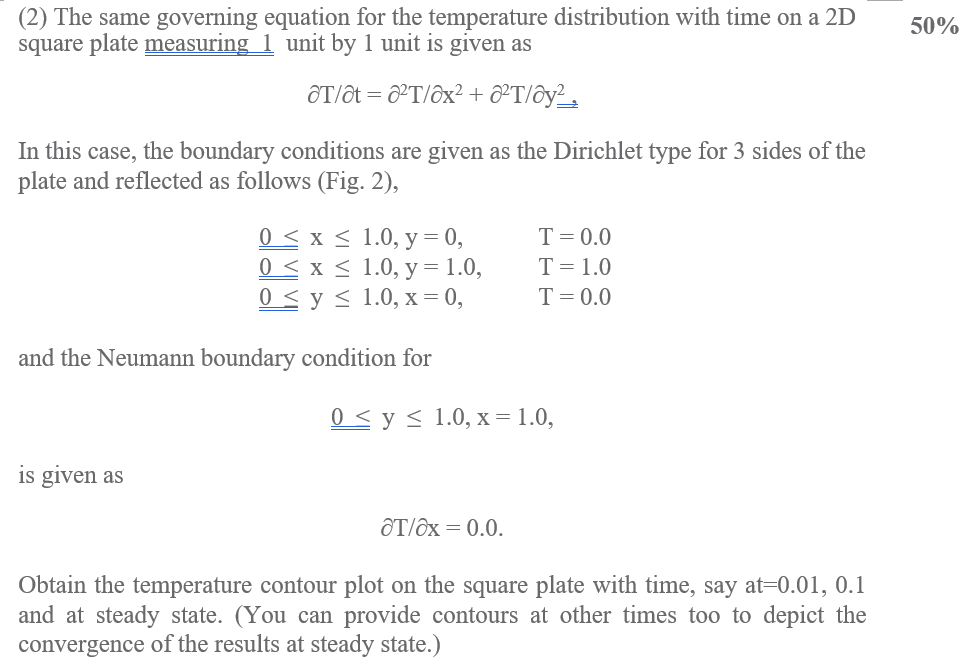

Set boundaries for Qn 2

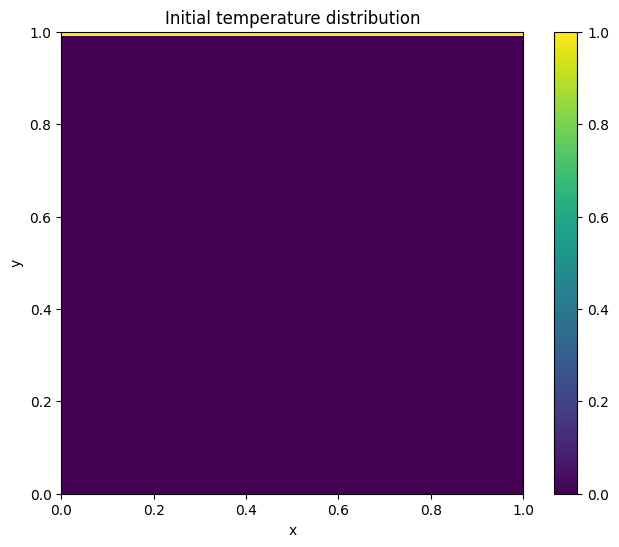

In [9]:
# Parameters

L = 1.0 # Length of the square plate

N = 100 # Number of grid points per dimension

dx = L / (N - 1) # Grid spacing

# Initialize temperature array

T = np.zeros((N, N))

# Boundary conditions - Dirichlet

T[-1, :] = 1.0 # Top boundary

# plot initial state

plt.figure(figsize=(8, 6))

plt.imshow(T, extent=(0, L, 0, L), origin='lower', cmap='viridis', aspect='equal')

plt.colorbar()

plt.title('Initial temperature distribution')

plt.xlabel('x')

plt.ylabel('y')

plt.show()

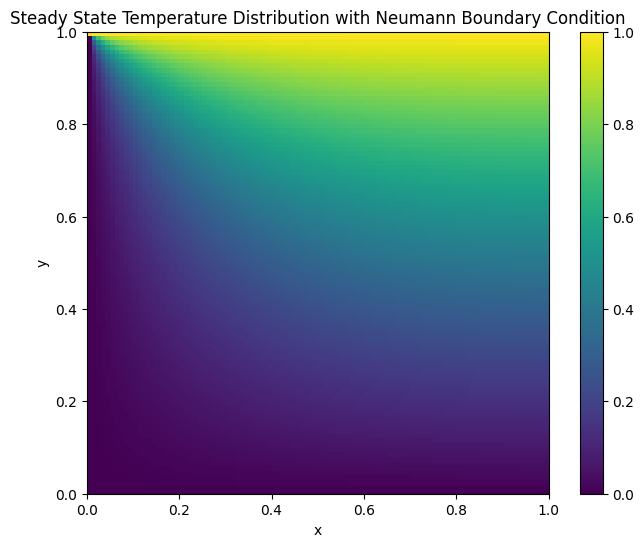

In [10]:


# Finite Difference Method for the steady state (Laplace equation)

for iteration in range(10000):

    T_new = T.copy()

# Update interior points

    for i in range(1, N-1):

        for j in range(1, N-1):

            T_new[j, i] = 0.25 * (T[j+1, i] + T[j-1, i] + T[j, i+1] + T[j, i-1])

# Neumann boundary condition at the right side

        T_new[:, -1] = T_new[:, -2]

# Convergence check

    if np.allclose(T, T_new, atol=1e-5):

        break

    T = T_new

# Plot the heatmap of the temperature distribution

plt.figure(figsize=(8, 6))

plt.imshow(T, extent=(0, L, 0, L), origin='lower', cmap='viridis', aspect='equal')

plt.colorbar()

plt.title('Steady State Temperature Distribution with Neumann Boundary Condition')

plt.xlabel('x')

plt.ylabel('y')

plt.show()